## Homework 4

Use this notebook as a starter

In [255]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [256]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [257]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv')
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Some of the features are encoded as numbers. Use the following code to de-code them:

In [258]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [259]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [260]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [261]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

What are the categorical variables? What are the numerical?

In [262]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int32 
dtypes: int32(1), int64(9), object(4)
memory usage: 469.9+ KB


In [264]:
df.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'],
      dtype='object')

In [265]:
categorical = ['home', 'marital', 'records', 'job']
numerical = ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [266]:
from sklearn.model_selection import train_test_split 

In [267]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [268]:
from sklearn.metrics import roc_auc_score

In [269]:
for feature in numerical:
    roc_auc = roc_auc_score(df_train['default'], df_train[feature])
    print(feature, roc_auc)

seniority 0.2906221375508058
time 0.5608662489595051
age 0.4267066727500061
expenses 0.4990815782782989
income 0.31799333386736695
assets 0.35139574328771983
debt 0.49521703242164505
amount 0.5910773431595518
price 0.5043329862114843


In [270]:
pos_corr = ['time','amount', 'price']
neg_corr = ['seniority', 'age', 'expenses', 'income', 'assets', 'debt']

In [271]:
for feature in pos_corr:
    roc_auc = roc_auc_score(df_train['default'], df_train[feature])
    print(feature, roc_auc)

time 0.5608662489595051
amount 0.5910773431595518
price 0.5043329862114843


In [272]:
for feature in neg_corr:
    roc_auc = roc_auc_score(df_train['default'], -df_train[feature])
    print(feature, roc_auc)

seniority 0.7093778624491943
age 0.5732933272499939
expenses 0.5009184217217011
income 0.682006666132633
assets 0.6486042567122802
debt 0.5047829675783548


### Seniority has highest AUC

Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [273]:
columns = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [274]:
y_train = df_train['default']
y_val = df_val['default']
y_test = df_test['default']

In [275]:
from sklearn.feature_extraction import DictVectorizer

In [276]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[columns].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

test_dict = df_test[columns].to_dict(orient='records')
X_test = dv.fit_transform(test_dict)

In [277]:
dv.get_feature_names()

['assets',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'records=no',
 'records=yes',
 'seniority']

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
model =  LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [318]:
y_pred = model.predict_proba(X_val)[:, 1]

In [281]:
model.score(X_val, y_val).round(2)

0.78

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [291]:
roc_auc_score(y_val, y_pred).round(3)

0.812

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [292]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [293]:
df_val = tpr_fpr_dataframe(y_val, y_pred)

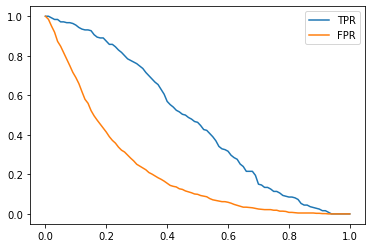

In [294]:
plt.plot(df_val.threshold, df_val['tpr'], label='TPR')
plt.plot(df_val.threshold, df_val['fpr'], label='FPR')
plt.legend()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [303]:
y_pred = model.predict(X_val)

In [304]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [305]:
predict_positive = (y_pred == 1)
predict_negative = (y_pred == 0)

In [306]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [307]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[581,  64],
       [132, 114]], dtype=int64)

In [308]:
p = tp / (tp + fp)
p

0.6404494382022472

In [309]:
r = tp / (tp + fn)
r

0.4634146341463415

In [311]:
F1 = 2*((p*r)/(p+r))

In [320]:
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        p = (tp / (tp + fp))
        r = (tp / (tp + fn))
        F1 = (2*((p*r)/(p+r)))
        print(t, F1.round(3))


0.0 0.433
0.01 0.437
0.02 0.442
0.03 0.448
0.04 0.461
0.05 0.463
0.06 0.473
0.07 0.481
0.08 0.492
0.09 0.502
0.1 0.508
0.11 0.514
0.12 0.526
0.13 0.539
0.14 0.548
0.15 0.562
0.16 0.565
0.17 0.57
0.18 0.578
0.19 0.588
0.2 0.591
0.21 0.595
0.22 0.605
0.23 0.607
0.24 0.611
0.25 0.614
0.26 0.611
0.27 0.612
0.28 0.617
0.29 0.622
0.3 0.629
0.31 0.628
0.32 0.627
0.33 0.622
0.34 0.622
0.35000000000000003 0.618
0.36 0.614
0.37 0.613
0.38 0.603
0.39 0.594
0.4 0.576
0.41000000000000003 0.573
0.42 0.567
0.43 0.557
0.44 0.558
0.45 0.551
0.46 0.554
0.47000000000000003 0.548
0.48 0.545
0.49 0.54
0.5 0.538
0.51 0.529
0.52 0.513
0.53 0.512
0.54 0.505
0.55 0.495
0.56 0.478
0.5700000000000001 0.452
0.58 0.441
0.59 0.437
0.6 0.431
0.61 0.412
0.62 0.403
0.63 0.398
0.64 0.372
0.65 0.361
0.66 0.33
0.67 0.331
0.68 0.332
0.6900000000000001 0.308
0.7000000000000001 0.247
0.71 0.242
0.72 0.225
0.73 0.225
0.74 0.213
0.75 0.196
0.76 0.196
0.77 0.185
0.78 0.165
0.79 0.159
0.8 0.154
0.81 0.154
0.8200000000000001 0.1

C:\Users\uic31271\AppData\Local\Temp/ipykernel_43012/1011945868.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  p = (tp / (tp + fp))


At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

### at .3 T

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std

Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.